# Multiple Regression Models to predict athlete performance. Notebook 4 of 5.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors, preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.pipeline import Pipeline

import pickle

Using TensorFlow backend.


In [2]:
data = pd.read_csv('AthleteResults.csv')

In [3]:
data.head()

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_Competition_experience,Second_Sex,Second_Equipment,Second_BodyweightKg,...,Second_EventDate,Second_Competition_experience,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_Competition_experience,birth_year
0,1,3,100.0,418.40,SoPac,2018-01-27,1,1,1,87.20,...,2017-09-30,2,1,3,100.00,413.84,SoPac,2017-09-09,3,1992.0
1,1,3,99.8,493.35,SoPac,2018-01-27,1,1,3,102.60,...,2017-09-09,2,1,3,99.50,500.05,SoPac,2017-07-21,3,1989.0
2,1,3,98.8,334.84,SoPac,2018-01-27,1,1,1,99.30,...,2017-10-07,2,1,3,93.80,340.99,SoPac,2012-11-09,3,1968.0
3,1,3,98.0,395.80,SoPac,2018-01-27,1,1,3,89.80,...,2016-07-08,2,1,3,89.80,399.45,SoPac,2014-11-21,3,1969.0
4,1,3,89.7,380.49,SoPac,2018-01-27,1,1,2,74.39,...,2017-02-23,2,1,2,74.57,306.66,NAmerica,2017-02-18,3,1990.0


In [4]:
data.query('First_Sex == 0').head()

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_Competition_experience,Second_Sex,Second_Equipment,Second_BodyweightKg,...,Second_EventDate,Second_Competition_experience,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_Competition_experience,birth_year
14,0,3,54.61,312.99,NAmerica,2018-01-27,1,0,3,55.88,...,2017-01-28,2,0,3,36.20,185.18,NAmerica,2012-06-23,3,2003.0
15,0,3,57.79,320.23,NAmerica,2018-01-27,1,0,3,58.88,...,2017-11-18,2,0,3,58.97,261.40,NAmerica,2017-11-04,3,2004.0
16,0,1,85.18,335.44,NAmerica,2018-01-27,1,0,1,88.00,...,2017-11-04,2,0,1,89.72,298.26,NAmerica,2017-10-07,3,1996.0
17,0,3,88.60,315.31,SoPac,2018-01-27,1,0,3,98.30,...,2017-09-09,2,0,3,99.00,288.10,SoPac,2016-09-03,3,1985.0
21,0,3,77.40,396.34,SoPac,2018-01-27,1,0,3,80.70,...,2017-07-21,2,0,3,73.90,405.42,SoPac,2017-03-18,3,1989.0


In [5]:
data.dtypes

First_Sex                          int64
First_Equipment                    int64
First_BodyweightKg               float64
First_Wilks                      float64
First_WhereHeld                   object
First_EventDate                   object
First_Competition_experience       int64
Second_Sex                         int64
Second_Equipment                   int64
Second_BodyweightKg              float64
Second_Wilks                     float64
Second_WhereHeld                  object
Second_EventDate                  object
Second_Competition_experience      int64
Third_Sex                          int64
Third_Equipment                    int64
Third_BodyweightKg               float64
Third_Wilks                      float64
Third_WhereHeld                   object
Third_EventDate                   object
Third_Competition_experience       int64
birth_year                       float64
dtype: object

In [6]:
data['First_WhereHeld'] = LabelEncoder().fit_transform(data['First_WhereHeld'])
data['Second_WhereHeld'] = LabelEncoder().fit_transform(data['Second_WhereHeld'])
data['Third_WhereHeld'] = LabelEncoder().fit_transform(data['Third_WhereHeld'])

In [7]:
#Ask about this
#https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
data.head()

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_Competition_experience,Second_Sex,Second_Equipment,Second_BodyweightKg,...,Second_EventDate,Second_Competition_experience,Third_Sex,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_Competition_experience,birth_year
0,1,3,100.0,418.40,5,2018-01-27,1,1,1,87.20,...,2017-09-30,2,1,3,100.00,413.84,5,2017-09-09,3,1992.0
1,1,3,99.8,493.35,5,2018-01-27,1,1,3,102.60,...,2017-09-09,2,1,3,99.50,500.05,5,2017-07-21,3,1989.0
2,1,3,98.8,334.84,5,2018-01-27,1,1,1,99.30,...,2017-10-07,2,1,3,93.80,340.99,5,2012-11-09,3,1968.0
3,1,3,98.0,395.80,5,2018-01-27,1,1,3,89.80,...,2016-07-08,2,1,3,89.80,399.45,5,2014-11-21,3,1969.0
4,1,3,89.7,380.49,5,2018-01-27,1,1,2,74.39,...,2017-02-23,2,1,2,74.57,306.66,3,2017-02-18,3,1990.0


In [8]:
data.drop('Third_Sex', axis=1, inplace=True)
data.drop('Second_Sex', axis=1, inplace=True)

In [9]:
data['First_EventDate'] = pd.to_datetime(data['First_EventDate'])
data['Second_EventDate'] = pd.to_datetime(data['Second_EventDate'])
data['Third_EventDate'] = pd.to_datetime(data['Third_EventDate'])


data['First_Rest'] = data['First_EventDate'] - data['Second_EventDate']
data['Second_Rest'] = data['Second_EventDate'] - data['Third_EventDate']
#not_features = ['First_EventDate', 'Second_EventDate', 'Third_EventDate', 'First_Wilks']

In [10]:
data['First_Rest']=data['First_Rest'].dt.days
data['Second_Rest'] = data['Second_Rest'].dt.days

In [11]:
data.columns

Index(['First_Sex', 'First_Equipment', 'First_BodyweightKg', 'First_Wilks',
       'First_WhereHeld', 'First_EventDate', 'First_Competition_experience',
       'Second_Equipment', 'Second_BodyweightKg', 'Second_Wilks',
       'Second_WhereHeld', 'Second_EventDate', 'Second_Competition_experience',
       'Third_Equipment', 'Third_BodyweightKg', 'Third_Wilks',
       'Third_WhereHeld', 'Third_EventDate', 'Third_Competition_experience',
       'birth_year', 'First_Rest', 'Second_Rest'],
      dtype='object')

In [91]:
features = data.columns
not_features = ['First_EventDate', 'Second_EventDate', 'Third_EventDate', 'First_Wilks']
features = features.drop(not_features)
y = data.First_Wilks
X = data[features]

In [92]:
#X

In [93]:
y.dtype

dtype('float64')

In [94]:
data.head()

,First_Sex,First_Equipment,First_BodyweightKg,First_Wilks,First_WhereHeld,First_EventDate,First_Competition_experience,Second_Equipment,Second_BodyweightKg,Second_Wilks,...,Second_Competition_experience,Third_Equipment,Third_BodyweightKg,Third_Wilks,Third_WhereHeld,Third_EventDate,Third_Competition_experience,birth_year,First_Rest,Second_Rest
0,1,3,100.0,418.40,5,2018-01-27,1,1,87.20,355.37,...,2,3,100.00,413.84,5,2017-09-09,3,1992.0,119,21
1,1,3,99.8,493.35,5,2018-01-27,1,3,102.60,485.08,...,2,3,99.50,500.05,5,2017-07-21,3,1989.0,140,50
2,1,3,98.8,334.84,5,2018-01-27,1,1,99.30,329.57,...,2,3,93.80,340.99,5,2012-11-09,3,1968.0,112,1793
3,1,3,98.0,395.80,5,2018-01-27,1,3,89.80,410.63,...,2,3,89.80,399.45,5,2014-11-21,3,1969.0,568,595
4,1,3,89.7,380.49,5,2018-01-27,1,2,74.39,331.56,...,2,2,74.57,306.66,3,2017-02-18,3,1990.0,338,5


In [95]:
print(X.shape, y.shape)

(12254, 18) (12254,)


# Linear Regression using various methods

AKA: my simple starting point

In [96]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import time

In [97]:
print(X.shape, y.shape)

(12254, 18) (12254,)


In [98]:
np.asarray(data)

array([[1, 3, 100.0, ..., 1992.0, 119, 21],
       [1, 3, 99.8, ..., 1989.0, 140, 50],
       [1, 3, 98.8, ..., 1968.0, 112, 1793],
       ..., 
       [1, 1, 103.0, ..., 1993.0, 197, 327],
       [1, 1, 85.4, ..., 1996.0, 147, 76],
       [1, 1, 92.5, ..., 1998.0, 181, 170]], dtype=object)

In [99]:
X.dtypes

First_Sex                          int64
First_Equipment                    int64
First_BodyweightKg               float64
First_WhereHeld                    int64
First_Competition_experience       int64
Second_Equipment                   int64
Second_BodyweightKg              float64
Second_Wilks                     float64
Second_WhereHeld                   int64
Second_Competition_experience      int64
Third_Equipment                    int64
Third_BodyweightKg               float64
Third_Wilks                      float64
Third_WhereHeld                    int64
Third_Competition_experience       int64
birth_year                       float64
First_Rest                         int64
Second_Rest                        int64
dtype: object

In [100]:
model = sm.OLS(y, X).fit()
sm.add_constant(X)
predictions = model.predict(X)

In [101]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            First_Wilks   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     3324.
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:49:21   Log-Likelihood:                -60374.
No. Observations:               12254   AIC:                         1.208e+05
Df Residuals:                   12238   BIC:                         1.209e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
First_Sex     

In [102]:
from sklearn.metrics import accuracy_score 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=167)

In [103]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_test_pred = lr.predict(X_test)
lr_train_pred=lr.predict(X_train)
lr.score(X_test, y_test) #Rsq score of our model

0.81360485846482944

In [104]:
gnb = GaussianNB #for classification later
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
model_knn = knn.fit(X_train, y_train)

In [105]:
knn_pred = knn.predict(X_test)
knn_actual= y_test
mse = (((knn_pred - knn_actual)**2).sum())/len(knn_pred)
#accuracy_score(y_test, knn_pred)
print(mse)

1278.88184025


In [106]:
# First Run Neural Network
X.shape

(12254, 18)

# Initialize Neural Network


In [108]:
def baseline_model():
    model = Sequential()
    #Adding Input layer and hidden layer
    model.add(Dense(6, input_dim=18, kernel_initializer='normal', activation='relu'))

#Add second layer
    model.add(Dense(1, kernel_initializer='normal'))

#Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [109]:
#Establish method to compare model accuracy
seed = 6
np.random.seed(seed)

#Evaluate model
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=128, verbose=1)

In [110]:
baseline = baseline_model()
baseline.fit(X_train, y_train, nb_epoch=100, validation_split=0.2, verbose = 1)

bl_pred = baseline.predict(X_test)

/opt/conda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 7352 samples, validate on 1838 samples
Epoch 1/100
7352/7352 [==============================] - 2s 225us/step - loss: 61734.9107 - val_loss: 3909.1457
Epoch 2/100
7352/7352 [==============================] - 1s 78us/step - loss: 3725.2384 - val_loss: 3326.0925
Epoch 3/100
7352/7352 [==============================] - 1s 80us/step - loss: 3184.6543 - val_loss: 2880.6885
Epoch 4/100
7352/7352 [==============================] - 1s 83us/step - loss: 2776.8464 - val_loss: 2545.0180
Epoch 5/100
7352/7352 [==============================] - 1s 77us/step - loss: 2459.6648 - val_loss: 2271.7593
Epoch 6/100
7352/7352 [==============================] - 1s 82us/step - loss: 2177.1909 - val_loss: 1994.0553
Epoch 7/100
7352/7352 [==============================] - 1s 81us/step - loss: 1919.1675 - val_loss: 1758.1456
Epoch 8/100
7352/7352 [==============================] - 1s 82us/step - loss: 1693.4971 - val_loss: 1527.6888
Epoch 9/100
7352/7352 [==============================] - 1s 85us/step 

In [111]:
#evaluate model
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)

Epoch 1/1
1226/1226 [==============================] - 0s 316us/step
Epoch 1/1
1226/1226 [==============================] - 0s 332us/step
Epoch 1/1
1226/1226 [==============================] - 0s 367us/step
Epoch 1/1
1226/1226 [==============================] - 1s 428us/step
Epoch 1/1
1225/1225 [==============================] - 0s 393us/step
Epoch 1/1
1225/1225 [==============================] - 0s 376us/step
Epoch 1/1
1225/1225 [==============================] - 0s 381us/step
Epoch 1/1
1225/1225 [==============================] - 0s 378us/step
Epoch 1/1
1225/1225 [==============================] - 1s 530us/step
Epoch 1/1
1225/1225 [==============================] - 0s 397us/step


In [112]:
#Baseline performance

In [113]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=100, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
#print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/10
11028/11028 [==============================] - 2s 165us/step - loss: 151201.3682
Epoch 2/10
11028/11028 [==============================] - 0s 29us/step - loss: 150555.2580
Epoch 3/10
11028/11028 [==============================] - 0s 28us/step - loss: 149123.0288
Epoch 4/10
11028/11028 [==============================] - 0s 28us/step - loss: 146876.0506
Epoch 5/10
11028/11028 [==============================] - 0s 28us/step - loss: 143658.0164
Epoch 6/10
11028/11028 [==============================] - 0s 29us/step - loss: 139678.0149
Epoch 7/10
11028/11028 [==============================] - 0s 28us/step - loss: 135110.1731
Epoch 8/10
11028/11028 [==============================] - 0s 30us/step - loss: 130044.3842
Epoch 9/10
11028/11028 [==============================] - 0s 32us/step - loss: 124609.5506
Epoch 10/10
1226/1226 [==============================] - 1s 439us/step
Epoch 1/10
11028/11028 [==============================] - 2s 147us/step - loss: 150729.9262
Epoch 2/10
11028/

<<<<<<<<<<<------------This is clearly not working well... My loss function suggests this may not be the optimal approach.

In [114]:
def larger_model():
    model=Sequential()
    model.add(Dense(28, input_dim=18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [115]:
lrg_model = larger_model()
lrg_model.fit(X_train, y_train,          
          nb_epoch=100, validation_split=0.2, verbose = 1)

/opt/conda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 7352 samples, validate on 1838 samples
Epoch 1/100
7352/7352 [==============================] - 2s 296us/step - loss: 48103.5093 - val_loss: 3422.8953
Epoch 2/100
7352/7352 [==============================] - 1s 111us/step - loss: 2760.6083 - val_loss: 1983.7438
Epoch 3/100
7352/7352 [==============================] - 1s 116us/step - loss: 1500.3796 - val_loss: 1194.0898
Epoch 4/100
7352/7352 [==============================] - 1s 123us/step - loss: 1267.3362 - val_loss: 1137.6323
Epoch 5/100
7352/7352 [==============================] - 1s 106us/step - loss: 1278.2943 - val_loss: 1143.6567
Epoch 6/100
7352/7352 [==============================] - 1s 121us/step - loss: 1249.9752 - val_loss: 1153.1107
Epoch 7/100
7352/7352 [==============================] - 1s 113us/step - loss: 1251.3561 - val_loss: 1140.4330
Epoch 8/100
7352/7352 [==============================] - 1s 107us/step - loss: 1249.0018 - val_loss: 1156.2928
Epoch 9/100
7352/7352 [==============================] - 1s 107

Epoch 74/100
7352/7352 [==============================] - 1s 101us/step - loss: 1186.6695 - val_loss: 1100.5232
Epoch 75/100
7352/7352 [==============================] - 1s 107us/step - loss: 1199.4765 - val_loss: 1121.2376
Epoch 76/100
7352/7352 [==============================] - 1s 99us/step - loss: 1204.2134 - val_loss: 1118.8105
Epoch 77/100
7352/7352 [==============================] - 1s 106us/step - loss: 1190.8199 - val_loss: 1111.4728
Epoch 78/100
7352/7352 [==============================] - 1s 102us/step - loss: 1196.6973 - val_loss: 1090.3994
Epoch 79/100
7352/7352 [==============================] - 1s 105us/step - loss: 1193.4605 - val_loss: 1129.9420
Epoch 80/100
7352/7352 [==============================] - 1s 106us/step - loss: 1201.2333 - val_loss: 1110.4513
Epoch 81/100
7352/7352 [==============================] - 1s 103us/step - loss: 1186.8667 - val_loss: 1122.5567
Epoch 82/100
7352/7352 [==============================] - 1s 104us/step - loss: 1194.8851 - val_loss: 112

In [116]:
lrg_pred = lrg_model.predict(X_test)

In [117]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=100, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -1121.03 (192.87) MSE


In [118]:
print(X.shape, X_test.shape, X_train.shape)

(12254, 18) (3064, 18) (9190, 18)


In [119]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
# define model
def new_baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=18, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [121]:
regr = new_baseline_model()
regr.fit(X_train, y_train,          
          nb_epoch=100, validation_split=0.2, verbose = 1) #batch_size=5,

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=18, activation="relu", kernel_initializer="normal")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  
/opt/conda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 7352 samples, validate on 1838 samples
Epoch 1/100
7352/7352 [==============================] - 3s 343us/step - loss: 150079.8919 - val_loss: 153722.7239
Epoch 2/100
7352/7352 [==============================] - 1s 106us/step - loss: 149592.3188 - val_loss: 152710.5348
Epoch 3/100
7352/7352 [==============================] - 1s 105us/step - loss: 148248.6584 - val_loss: 150955.7816
Epoch 4/100
7352/7352 [==============================] - 1s 105us/step - loss: 146359.7884 - val_loss: 148694.7193
Epoch 5/100
7352/7352 [==============================] - 1s 100us/step - loss: 144042.5443 - val_loss: 146023.7937
Epoch 6/100
7352/7352 [==============================] - 1s 106us/step - loss: 141365.6685 - val_loss: 142993.4637
Epoch 7/100
7352/7352 [==============================] - 1s 100us/step - loss: 138407.3883 - val_loss: 139697.2552
Epoch 8/100
7352/7352 [==============================] - 1s 107us/step - loss: 135214.4042 - val_loss: 136197.3504
Epoch 9/100
7352/7352 [=========

In [122]:
regr_pred = regr.predict(X_test)

In [123]:
knn_pred

array([ 376.17409943,  510.66583321,  409.43234399, ...,  389.0203482 ,
        352.9378867 ,  315.43237237])

In [124]:
lr_test_pred

array([ 374.23795658,  503.20717228,  418.65631157, ...,  421.50902717,
        363.24304435,  330.32872465])

In [125]:
predictions= pd.DataFrame(y_test)

In [126]:
#y_test
predictions.head()

,First_Wilks
3845,385.29
11881,510.96
5857,410.09
2118,390.12
5463,443.35


In [127]:
predictions['lin_reg']=lr_test_pred
predictions['knn']= knn_pred
predictions['new_baseline']=regr_pred
predictions['Larger_model']= lrg_pred
predictions['Baseline_model']= bl_pred

In [128]:
predictions.head()

,First_Wilks,lin_reg,knn,new_baseline,Larger_model,Baseline_model
3845,385.29,374.237957,376.174099,389.727478,382.647858,379.452515
11881,510.96,503.207172,510.665833,490.204376,522.751343,503.464386
5857,410.09,418.656312,409.432344,376.656372,423.293976,419.256073
2118,390.12,398.942434,387.215655,419.145203,403.368774,401.377838
5463,443.35,429.051710,420.622142,338.617645,433.575378,428.113800


In [129]:
import seaborn as sns
from pylab import *

In [130]:
predictions.head()

,First_Wilks,lin_reg,knn,new_baseline,Larger_model,Baseline_model
3845,385.29,374.237957,376.174099,389.727478,382.647858,379.452515
11881,510.96,503.207172,510.665833,490.204376,522.751343,503.464386
5857,410.09,418.656312,409.432344,376.656372,423.293976,419.256073
2118,390.12,398.942434,387.215655,419.145203,403.368774,401.377838
5463,443.35,429.051710,420.622142,338.617645,433.575378,428.113800


In [131]:
sorted_pred = predictions.sort_index(axis=0)

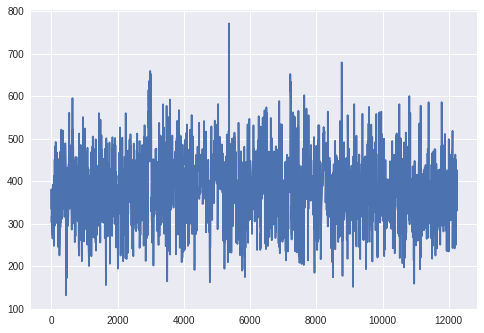

In [132]:
plt.plot(sorted_pred['First_Wilks'])

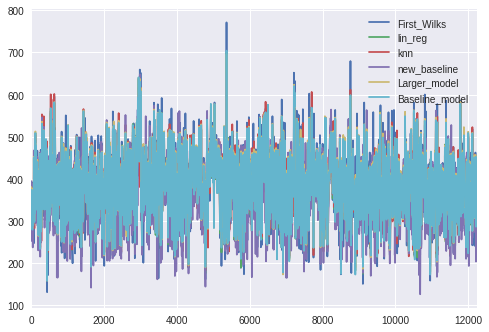

In [133]:
sorted_pred.plot()

In [134]:
trad_methods = sorted_pred[['First_Wilks', 'lin_reg', 'knn']]
ML_methods = sorted_pred[['First_Wilks', 'new_baseline', 'Larger_model', 'Baseline_model']]

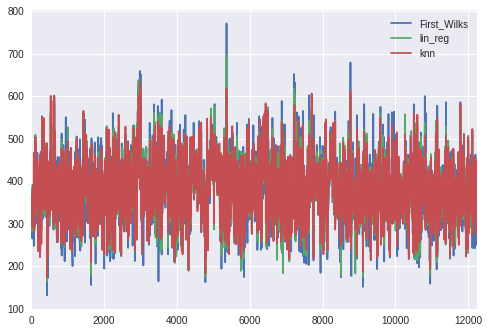

In [135]:
trad_methods.plot()

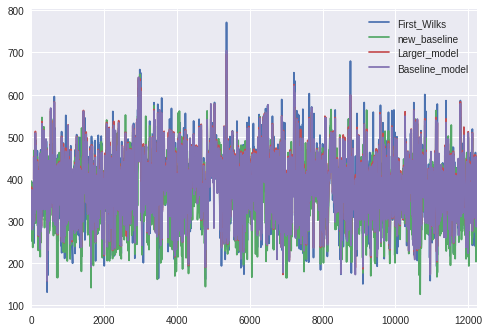

In [136]:
ML_methods.plot()

In [137]:
ML_error = pd.DataFrame()
trad_error = pd.DataFrame()

In [138]:
ML_error['new_baseline'] = ML_methods['new_baseline']-ML_methods['First_Wilks']
ML_error['Larger_model'] = ML_methods['Larger_model']-ML_methods['First_Wilks']
ML_error['Baseline_model'] = ML_methods['Baseline_model']-ML_methods['First_Wilks']

trad_error['lin_reg'] = trad_methods['lin_reg'] - trad_methods['First_Wilks']
trad_error['knn'] = trad_methods['knn'] - trad_methods['First_Wilks']

In [139]:
ML_methods.head()

,First_Wilks,new_baseline,Larger_model,Baseline_model
2,334.84,279.559204,362.143951,343.400696
4,380.49,370.311005,351.511993,347.719971
6,369.26,394.590210,380.735413,373.819336
10,302.55,316.827789,318.889038,306.096466
13,317.17,336.219727,343.145996,343.293976


In [140]:
ML_error.head()

,new_baseline,Larger_model,Baseline_model
2,-55.280796,27.303951,8.560696
4,-10.178995,-28.978007,-32.770029
6,25.330210,11.475413,4.559336
10,14.277789,16.339038,3.546466
13,19.049727,25.975996,26.123976


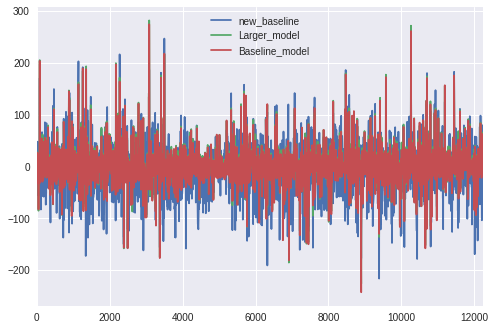

In [141]:
ML_error.plot()

In [142]:
trad_error.head()

,lin_reg,knn
2,21.434742,14.122639
4,-31.397442,-32.395128
6,9.032184,0.297671
10,15.092840,31.536390
13,24.670749,21.971096


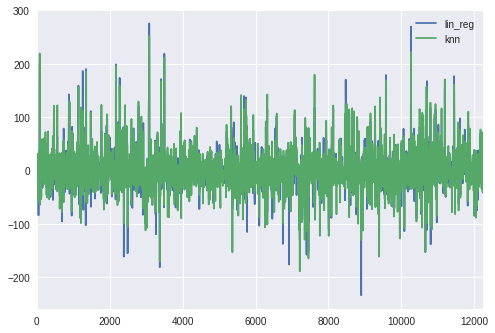

In [143]:
trad_error.plot()

In [144]:
error = ML_error
error['knn']=trad_error['knn']
error['lin_reg'] = trad_error['lin_reg']

In [145]:
error.head()

,new_baseline,Larger_model,Baseline_model,knn,lin_reg
2,-55.280796,27.303951,8.560696,14.122639,21.434742
4,-10.178995,-28.978007,-32.770029,-32.395128,-31.397442
6,25.330210,11.475413,4.559336,0.297671,9.032184
10,14.277789,16.339038,3.546466,31.536390,15.092840
13,19.049727,25.975996,26.123976,21.971096,24.670749


In [146]:
error.describe()

,new_baseline,Larger_model,Baseline_model,knn,lin_reg
count,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000
mean,-6.228364,5.058739,1.706197,0.865608,0.356176
std,49.800767,33.112446,33.297857,35.756815,32.654484
min,-216.684030,-226.682523,-243.030317,-188.818755,-233.638253
25%,-36.305574,-8.384431,-12.171061,-15.896892,-13.278490
50%,-5.029142,5.113253,1.342968,-0.046696,-0.026311
75%,24.768750,17.307959,14.442359,15.680426,12.407919
max,250.062346,281.744908,274.172704,251.900866,275.735307


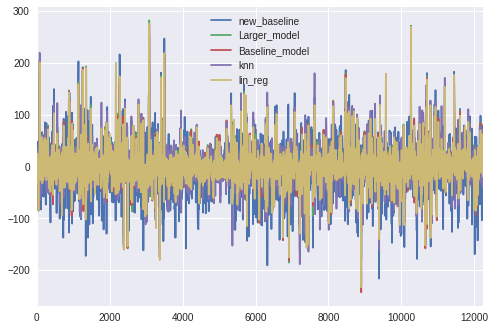

In [147]:
error.plot()

In [148]:
AthLookup = pd.read_csv('AthTable.csv')

In [149]:
AthLookup.drop_duplicates(subset='AthID', inplace=True)

In [150]:
AthLookup.shape

(100490, 2)

In [151]:
predictions.shape

(3064, 6)

# Save Models for later use

In [161]:
#, open(LinearRegressionModel)
LinearModel = 'linear_model.sav' #lr
KnnModel = 'knnModel.sav' #knn
NewBaseModel = 'NewBaseModel.h5' #regr
LargerModel = 'LargerModel.h5' #lrg_model
baseModel = 'baseline.h5' #baseline

In [162]:
pickle.dump(lr, open(LinearModel, 'wb'))

In [163]:
pickle.dump(knn, open(KnnModel, 'wb'))

In [164]:
#pickle.dump(regr, open(NewBaseModel, 'w'))
regr.save(NewBaseModel)

In [165]:
lrg_model.save(LargerModel)

In [166]:
baseline.save(baseModel)